Binary Columns: []
Categorical Columns: []
Continuous Columns: ['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']


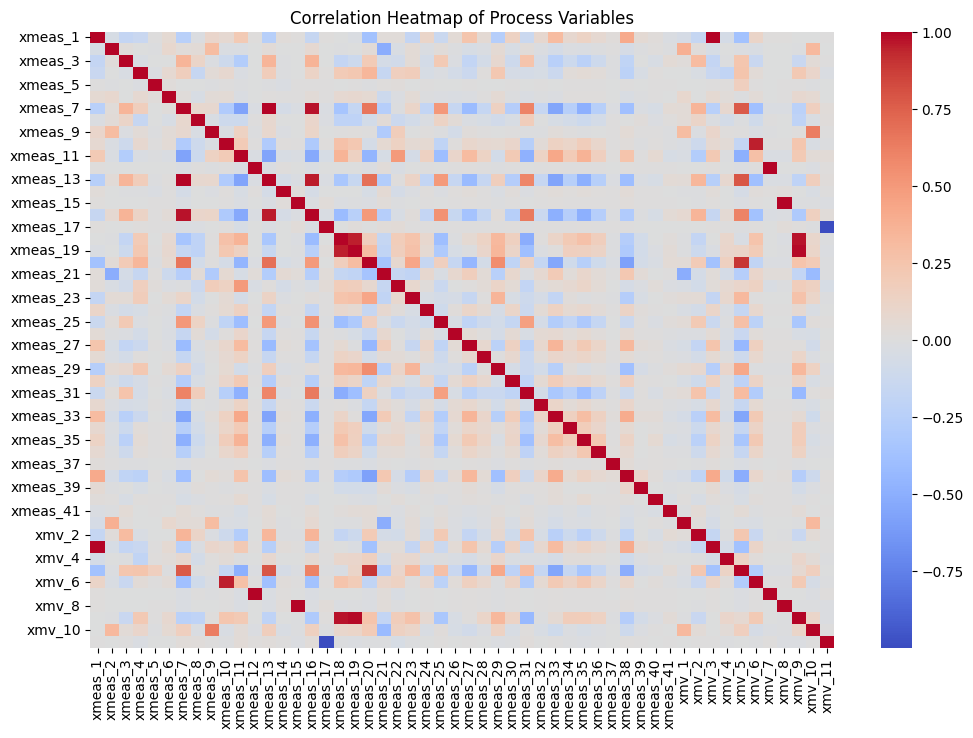

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 52)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 50, 64)         │        10,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 25, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 50, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 50, 52)         │         3,380 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,524 (568.45 KB)

 Trainable params: 145,524 (568.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - loss: 0.9308 - val_loss: 0.8025
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 151ms/step - loss: 0.7578 - val_loss: 0.7052
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - loss: 0.6952 - val_loss: 0.6818
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.6759 - val_loss: 0.6683
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.6642 - val_loss: 0.6588
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - loss: 0.6550 - val_loss: 0.6510
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.6479 - val_loss: 0.6442
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.6411 - val_loss: 0.6390
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.6355 - val_loss: 0.6329
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - loss: 0.6311 - val_loss: 0.6288
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - loss: 0.6262 - val_loss: 0.6250
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 134

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers, models, callbacks
from scipy.ndimage import gaussian_filter1d

file_def = {"ff_train": "TEP_FaultFree_Training.csv","ff_test" : "TEP_FaultFree_Testing.csv","fa_test" : "TEP_Faulty_Testing.csv"}
columns = list(range(3, 55))  # Process variables only
sequence, strides, batch = 50, 10, 512

def load_split(tag):

    path ="/content/drive/MyDrive/TEP"
    #Load and return selected columns from a CSV split
    path = os.path.join(path, file_def[tag])
    return pd.read_csv(path, usecols=columns, dtype=np.float32)


def make_dataset(X, stride=strides, shuffle=True):
    #Converting numpy array into TensorFlow time-series dataset
    ds = tf.keras.utils.timeseries_dataset_from_array(X, None, sequence_length=sequence, sequence_stride=stride,batch_size=batch,shuffle=shuffle)
    ds = ds.map(lambda w: (tf.cast(w, tf.float32), tf.cast(w, tf.float32)),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    return ds

def classify_columns(df):
    #Classifying columns as binary, categorical, or continuous
    binary = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
    categorical = [col for col in df.columns if df[col].nunique() < 10 and col not in binary]
    continuous = [col for col in df.columns if col not in binary + categorical]
    return binary, categorical, continuous

def plot_correlation(df):
    #Plotting correlation heatmap of continuous variables
    plt.figure(figsize=(12, 8))
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap of Process Variables")
    plt.show()

#Loading faultfree train data
ff_train_df = load_split("ff_train")

#Column type distribution
binary_cols, cat_cols, cont_cols = classify_columns(ff_train_df)
print("Binary Columns:", binary_cols)
print("Categorical Columns:", cat_cols)
print("Continuous Columns:", cont_cols)

#Preprocessing and analysis
#Correlation heatmap
plot_correlation(ff_train_df)

#Imputing missing values
imputer = SimpleImputer(strategy="mean")
ff_train_imputed = imputer.fit_transform(ff_train_df)

#Applying Gaussian smoothing
ff_train_smoothed = gaussian_filter1d(ff_train_imputed, sigma=1, axis=0)

#Normalizing all the continuous values along the sensor data using Z-score
scaler = StandardScaler().fit(ff_train_smoothed)
ff_train_scaled = scaler.transform(ff_train_smoothed).astype(np.float32)

#Garbage collection
del ff_train_df, ff_train_imputed, ff_train_smoothed
gc.collect()

#apply all above changes to test set as well
ff_test_df = load_split("ff_test")
ff_test_imputed = imputer.transform(ff_test_df)
ff_test_smoothed = gaussian_filter1d(ff_test_imputed, sigma=1, axis=0)
ff_test_scaled = scaler.transform(ff_test_smoothed).astype(np.float32)

#Garbage collection
del ff_test_df, ff_test_imputed, ff_test_smoothed
gc.collect()

#load scaled data to var to train
train_ds = make_dataset(ff_train_scaled, shuffle=True)
val_ds   = make_dataset(ff_test_scaled , shuffle=False)

#Defining loss function
feat_std = tf.constant(ff_train_scaled.std(axis=0, keepdims=True) + 1e-6, dtype=tf.float32) #always typecasting all preprocessed entitites to float32.

def weighted_mse(y_true, y_pred):
    err = (y_true - y_pred) / feat_std
    return tf.reduce_mean(tf.square(err), axis=[1, 2])

#Defining LSTM autoencoder model
def build_autoencoder(sequence, n_feat):
    inp = layers.Input(shape=(sequence, n_feat))
    x   = layers.Conv1D(64, 3, activation='relu', padding='same')(inp)
    x   = layers.MaxPooling1D(2)(x)
    x   = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
    x   = layers.Bidirectional(layers.LSTM(32))(x)
    x   = layers.RepeatVector(sequence)(x)
    x   = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
    out = layers.TimeDistributed(layers.Dense(n_feat))(x)
    return models.Model(inp, out)

#Build and compiling autoencoder
ae = build_autoencoder(sequence, len(columns))
ae.compile(optimizer='adam', loss=weighted_mse) #using adam optimizer and loss-weighted mse
ae.summary()
#model training
ae.fit(train_ds,validation_data=val_ds,epochs=50,callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)],verbose=1)


In [ ]:
import numpy as np, tensorflow as tf, sklearn.metrics as skm

fa_test = scaler.transform(load_split("fa_test")).astype(np.float32)

# build windows
def window_count(n):
    return (n-sequence)

k = min(window_count(len(ff_test)), window_count(len(fa_test)))
seg_len = (k-1) * strides + sequence

ff_seg = ff_test[:seg_len]
fa_seg = fa_test[:seg_len]

eval_X = np.vstack([ff_seg, fa_seg])
eval_ds = tf.keras.utils.timeseries_dataset_from_array(eval_X, None,sequence_length=sequence,sequence_stride=strides,batch_size=batch, shuffle=False)
#defining error
errs = []
for batch in eval_ds:
    recon = ae(batch, training=False)
    batch_err = tf.reduce_mean(tf.square((batch - recon) / feat_std), axis=[1,2])
    errs.append(batch_err.numpy())
errs = np.concatenate(errs)
# build labels that always match the length of 'errs'
half=len(errs) // 2
labels=np.concatenate([np.zeros(half), np.ones(len(errs) - half)]).astype(int)
# ROC
fpr, tpr, thr = skm.roc_curve(labels, errs)
j_idx = (tpr - fpr).argmax()
best_thr = thr[j_idx]
pred = (errs > best_thr).astype(int)
print(f"Chosen threshold (Youden-J) = {best_thr:.6f}")
print(skm.classification_report(labels, pred,target_names=["Normal", "Anomaly"]))
